# Predicting Carbon Dioxide Emission of a New Car Model based on its Engine Size using Polynomial Regression

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Downloading the Data

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Extracting Necessary Columns

In [4]:
cdf = df[['MODEL', 'ENGINESIZE', 'CO2EMISSIONS']]
cdf = cdf.set_index('MODEL')
cdf.head()

,ENGINESIZE,CO2EMISSIONS
MODEL,,
ILX,2.0,196
ILX,2.4,221
ILX HYBRID,1.5,136
MDX 4WD,3.5,255
RDX AWD,3.5,244


### Plotting Various Features

<IPython.core.display.Javascript object>


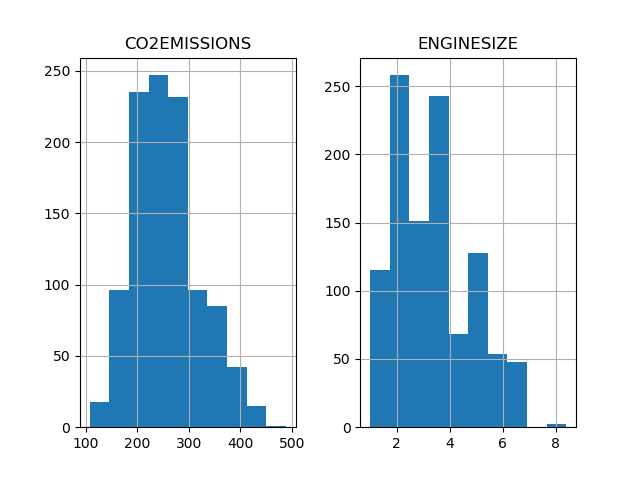

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000079F5D4EF08>,
      dtype=object)

In [5]:
cdf.hist()

### Plotting CO2 Emissions vs Engine Size

<IPython.core.display.Javascript object>


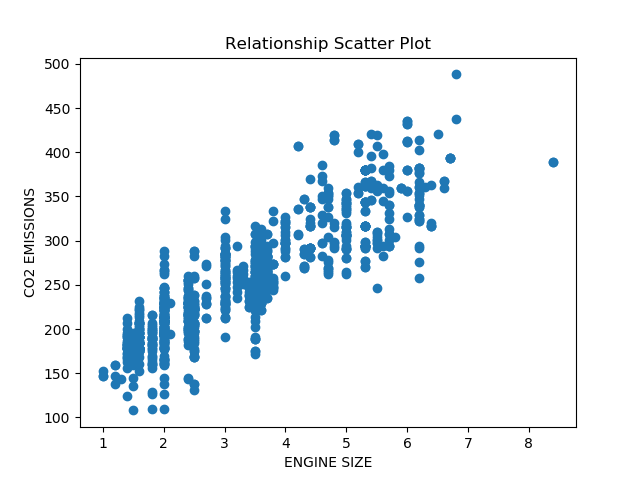

Text(0.5, 1.0, 'Relationship Scatter Plot')

In [6]:
plt.figure()
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.title('Relationship Scatter Plot')

### Splitting Data into Train and Test

In [7]:
from sklearn.model_selection import train_test_split
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

### Polynomial Regression Model

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
reg = linear_model.LinearRegression()
reg.fit(X_train_poly, y_train)
print("Coefficient = ", reg.coef_)
print("Intercept = ", reg.intercept_)

Coefficient =  [[ 0.         49.44724505 -1.34988027]]
Intercept =  [109.857053]


### Plotting the Fit Curve over the Data

<IPython.core.display.Javascript object>


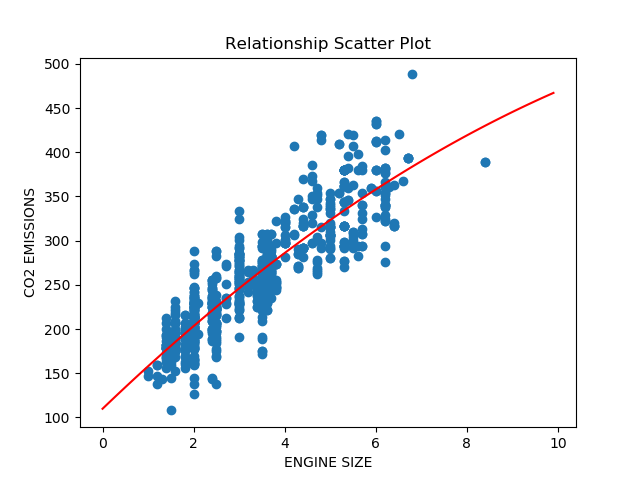

In [9]:
plt.figure()
plt.scatter(X_train.ENGINESIZE, y_train.CO2EMISSIONS)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.title('Relationship Scatter Plot')
x = np.arange(0.0, 10.0, 0.1)
y = reg.intercept_[0] + (reg.coef_[0][1]*x) + (reg.coef_[0][2]*np.power(x,2))
plt.plot(x, y , '-r')

### Model Accuracy

In [10]:
reg.score(X_test_poly, y_test)

0.7237141291367732

### Predicting CO2 Emission for given Features

In [11]:
reg.predict([[0, 7.5, 56.25]])

array([[404.7806256]])

### Evaluation Metrics

In [12]:
from sklearn.metrics import r2_score
y_hat_test = reg.predict(X_test_poly)
print("MAE = ", np.mean(np.absolute(y_hat_test - y_test)))
print("RMSE = ", np.sqrt(np.mean((y_hat_test - y_test)**2)))
print("R2 Score = ", r2_score(y_hat_test, y_test))

MAE =  CO2EMISSIONS    25.513994
dtype: float64
RMSE =  CO2EMISSIONS    34.151673
dtype: float64
R2 Score =  0.6414001297257608
